In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
data = pd.read_csv(r'./charge_hourly_with_Covid_new.csv')
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,10,NaN,False,3.0,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,11,NaN,False,3.0,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,12,NaN,False,3.0,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,13,NaN,False,3.0,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,14,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000925
10884,2022-02-28 21:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10885,2022-02-28 22:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10886,2022-02-28 23:00:00,0.000000,1,0,Spring holiday,True,0.0,0.000000,0.000000,0.000000


<AxesSubplot:ylabel='Density'>

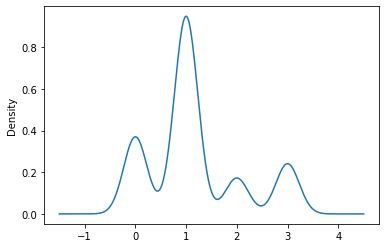

In [3]:
#data.loc[data.Energy_kWh > 3,'Energy_kWh'].plot.density()
data.loc[data.Energy_kWh > 3,'measure'].plot.density()

In [4]:
data_test = pd.read_csv(r'./charge0422_hourly_with_Covid_new.csv')

<AxesSubplot:ylabel='Density'>

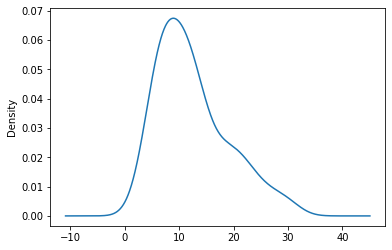

In [5]:
data_test.loc[data_test.Energy_kWh > 3, 'Energy_kWh'].plot.density()

## training set

In [6]:
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,10,NaN,False,3.0,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,11,NaN,False,3.0,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,12,NaN,False,3.0,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,13,NaN,False,3.0,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,14,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000925
10884,2022-02-28 21:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10885,2022-02-28 22:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10886,2022-02-28 23:00:00,0.000000,1,0,Spring holiday,True,0.0,0.000000,0.000000,0.000000


In [7]:
data['Energy_kWh_1'] = data['Energy_kWh'].shift(-1)
data['Energy_kWh_2'] = data['Energy_kWh'].shift(-2)
data['Energy_kWh_3'] = data['Energy_kWh'].shift(-3)
data['Energy_kWh_4'] = data['Energy_kWh'].shift(-4)
data['Energy_kWh_5'] = data['Energy_kWh'].shift(-5)
data['Energy_kWh_6'] = data['Energy_kWh'].shift(-6)
data['Energy_kWh_7'] = data['Energy_kWh'].shift(-7)
data['Energy_kWh_8'] = data['Energy_kWh'].shift(-8)
data['Energy_kWh_9'] = data['Energy_kWh'].shift(-9)
data['Energy_kWh_10'] = data['Energy_kWh'].shift(-10)
data['Energy_kWh_11'] = data['Energy_kWh'].shift(-11)
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,...,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4,Energy_kWh_5,Energy_kWh_6,Energy_kWh_7,Energy_kWh_8,Energy_kWh_9,Energy_kWh_10,Energy_kWh_11
0,2020-12-02 09:00:00,4.214567,2,10,NaN,False,3.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000558,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-12-02 10:00:00,0.560625,2,11,NaN,False,3.0,4.214567,NaN,NaN,...,0.000000,0.000558,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-02 11:00:00,0.000000,2,12,NaN,False,3.0,0.560625,4.214567,NaN,...,0.000558,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-02 12:00:00,0.000000,2,13,NaN,False,3.0,0.000000,0.560625,4.214567,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-02 13:00:00,0.000558,2,14,NaN,False,3.0,0.000000,0.000000,0.560625,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000925,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10884,2022-02-28 21:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10885,2022-02-28 22:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10886,2022-02-28 23:00:00,0.000000,1,0,Spring holiday,True,0.0,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data = data.iloc[3:-11]
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,...,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4,Energy_kWh_5,Energy_kWh_6,Energy_kWh_7,Energy_kWh_8,Energy_kWh_9,Energy_kWh_10,Energy_kWh_11
3,2020-12-02 12:00:00,0.000000,2,13,NaN,False,3.0,0.000000,0.560625,4.214567,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,2020-12-02 13:00:00,0.000558,2,14,NaN,False,3.0,0.000000,0.000000,0.560625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,2020-12-02 14:00:00,0.000000,2,15,NaN,False,3.0,0.000558,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,2020-12-02 15:00:00,0.000000,2,16,NaN,False,3.0,0.000000,0.000558,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,2020-12-02 16:00:00,0.000000,2,17,NaN,False,3.0,0.000000,0.000000,0.000558,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,2022-02-28 09:00:00,0.000000,0,10,Spring holiday,True,0.0,1.720417,3.006733,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.047292,0.007133,0.000925,0.0,0.0,0.0
10873,2022-02-28 10:00:00,1.910950,0,11,Spring holiday,True,0.0,0.000000,1.720417,3.006733,...,0.000000,0.000000,0.000000,0.047292,0.007133,0.000925,0.000000,0.0,0.0,0.0
10874,2022-02-28 11:00:00,0.000000,0,12,Spring holiday,True,0.0,1.910950,0.000000,1.720417,...,0.000000,0.000000,0.047292,0.007133,0.000925,0.000000,0.000000,0.0,0.0,0.0
10875,2022-02-28 12:00:00,0.000000,0,13,Spring holiday,True,0.0,0.000000,1.910950,0.000000,...,0.000000,0.047292,0.007133,0.000925,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [9]:
data.reset_index(inplace=True)

In [10]:
df = data.drop(['index', 'hols', 'Time'], axis=1)
df.loc[:, 'measure'] = df['measure'].astype(int)
df

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4,Energy_kWh_5,Energy_kWh_6,Energy_kWh_7,Energy_kWh_8,Energy_kWh_9,Energy_kWh_10,Energy_kWh_11
0,0.000000,2,13,False,3,0.000000,0.560625,4.214567,0.000558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000558,2,14,False,3,0.000000,0.000000,0.560625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,2,15,False,3,0.000558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,2,16,False,3,0.000000,0.000558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,2,17,False,3,0.000000,0.000000,0.000558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10869,0.000000,0,10,True,0,1.720417,3.006733,0.000000,1.910950,0.000000,0.000000,0.000000,0.000000,0.047292,0.007133,0.000925,0.0,0.0,0.0
10870,1.910950,0,11,True,0,0.000000,1.720417,3.006733,0.000000,0.000000,0.000000,0.000000,0.047292,0.007133,0.000925,0.000000,0.0,0.0,0.0
10871,0.000000,0,12,True,0,1.910950,0.000000,1.720417,0.000000,0.000000,0.000000,0.047292,0.007133,0.000925,0.000000,0.000000,0.0,0.0,0.0
10872,0.000000,0,13,True,0,0.000000,1.910950,0.000000,0.000000,0.000000,0.047292,0.007133,0.000925,0.000000,0.000000,0.000000,0.0,0.0,0.0


<AxesSubplot:>

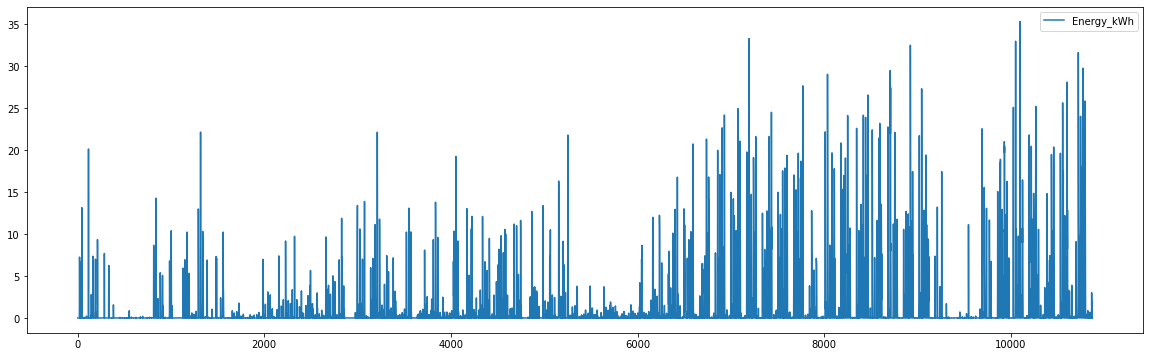

In [11]:
sample = df[['Energy_kWh']].copy()
#sample.loc[sample.Energy_kWh > 6,'Energy_kWh'] = 0
sample.plot(figsize=(20,6))
#sample

In [12]:
df.loc[df.Energy_kWh > 5, 'hour'].unique()

array([ 9, 10, 15, 11, 12,  8, 13, 14, 16, 17, 18, 19, 20, 21,  7])

## test set

In [13]:
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2022-03-01 04:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0
1,2022-03-01 05:00:00,0.000000,1,6,Spring holiday,True,0,0.000000,0.000000,0.0
2,2022-03-01 06:00:00,0.044108,1,7,Spring holiday,True,0,0.000000,0.000000,0.0
3,2022-03-01 07:00:00,7.013325,1,8,Spring holiday,True,0,0.044108,0.000000,0.0
4,2022-03-01 08:00:00,7.089000,1,9,Spring holiday,True,0,7.013325,0.044108,0.0
...,...,...,...,...,...,...,...,...,...,...
647,2022-03-28 03:00:00,0.000000,0,5,NaN,False,0,0.000000,0.000000,0.0
648,2022-03-28 04:00:00,0.000000,0,6,NaN,False,0,0.000000,0.000000,0.0
649,2022-03-28 05:00:00,0.000000,0,7,NaN,False,0,0.000000,0.000000,0.0
650,2022-03-28 06:00:00,15.496425,0,8,NaN,False,0,0.000000,0.000000,0.0


In [14]:
data_test['Energy_kWh_1'] = data_test['Energy_kWh'].shift(-1)
data_test['Energy_kWh_2'] = data_test['Energy_kWh'].shift(-2)
data_test['Energy_kWh_3'] = data_test['Energy_kWh'].shift(-3)
data_test['Energy_kWh_4'] = data_test['Energy_kWh'].shift(-4)
data_test['Energy_kWh_5'] = data_test['Energy_kWh'].shift(-5)
data_test['Energy_kWh_6'] = data_test['Energy_kWh'].shift(-6)
data_test['Energy_kWh_7'] = data_test['Energy_kWh'].shift(-7)
data_test['Energy_kWh_8'] = data_test['Energy_kWh'].shift(-8)
data_test['Energy_kWh_9'] = data_test['Energy_kWh'].shift(-9)
data_test['Energy_kWh_10'] = data_test['Energy_kWh'].shift(-10)
data_test['Energy_kWh_11'] = data_test['Energy_kWh'].shift(-11)
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,...,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4,Energy_kWh_5,Energy_kWh_6,Energy_kWh_7,Energy_kWh_8,Energy_kWh_9,Energy_kWh_10,Energy_kWh_11
0,2022-03-01 04:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0,...,0.044108,7.013325,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000
1,2022-03-01 05:00:00,0.000000,1,6,Spring holiday,True,0,0.000000,0.000000,0.0,...,7.013325,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000
2,2022-03-01 06:00:00,0.044108,1,7,Spring holiday,True,0,0.000000,0.000000,0.0,...,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117
3,2022-03-01 07:00:00,7.013325,1,8,Spring holiday,True,0,0.044108,0.000000,0.0,...,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117,0.000000
4,2022-03-01 08:00:00,7.089000,1,9,Spring holiday,True,0,7.013325,0.044108,0.0,...,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,2022-03-28 03:00:00,0.000000,0,5,NaN,False,0,0.000000,0.000000,0.0,...,0.000000,15.496425,28.914517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,2022-03-28 04:00:00,0.000000,0,6,NaN,False,0,0.000000,0.000000,0.0,...,15.496425,28.914517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,2022-03-28 05:00:00,0.000000,0,7,NaN,False,0,0.000000,0.000000,0.0,...,28.914517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,2022-03-28 06:00:00,15.496425,0,8,NaN,False,0,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data_test = data_test.iloc[:-11]
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,...,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4,Energy_kWh_5,Energy_kWh_6,Energy_kWh_7,Energy_kWh_8,Energy_kWh_9,Energy_kWh_10,Energy_kWh_11
0,2022-03-01 04:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.000000,...,0.044108,7.013325,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000
1,2022-03-01 05:00:00,0.000000,1,6,Spring holiday,True,0,0.000000,0.000000,0.000000,...,7.013325,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000
2,2022-03-01 06:00:00,0.044108,1,7,Spring holiday,True,0,0.000000,0.000000,0.000000,...,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117
3,2022-03-01 07:00:00,7.013325,1,8,Spring holiday,True,0,0.044108,0.000000,0.000000,...,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117,0.000000
4,2022-03-01 08:00:00,7.089000,1,9,Spring holiday,True,0,7.013325,0.044108,0.000000,...,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2022-03-27 16:00:00,0.000000,6,18,NaN,False,0,0.000000,0.000000,0.257558,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
637,2022-03-27 17:00:00,0.043333,6,19,NaN,False,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
638,2022-03-27 18:00:00,0.000000,6,20,NaN,False,0,0.043333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
639,2022-03-27 19:00:00,0.000000,6,21,NaN,False,0,0.000000,0.043333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.496425


In [16]:
df_test = data_test.drop(['hols', 'Time'], axis=1)
df_test.loc[:, 'measure'] = df_test['measure'].astype(int)
df_test

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4,Energy_kWh_5,Energy_kWh_6,Energy_kWh_7,Energy_kWh_8,Energy_kWh_9,Energy_kWh_10,Energy_kWh_11
0,0.000000,1,5,True,0,0.000000,0.000000,0.000000,0.000000,0.044108,7.013325,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000
1,0.000000,1,6,True,0,0.000000,0.000000,0.000000,0.044108,7.013325,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000
2,0.044108,1,7,True,0,0.000000,0.000000,0.000000,7.013325,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117
3,7.013325,1,8,True,0,0.044108,0.000000,0.000000,7.089000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117,0.000000
4,7.089000,1,9,True,0,7.013325,0.044108,0.000000,7.154083,6.869500,1.168642,0.000000,0.114525,0.000000,0.000000,0.000000,0.001117,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,0.000000,6,18,False,0,0.000000,0.000000,0.257558,0.043333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
637,0.043333,6,19,False,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
638,0.000000,6,20,False,0,0.043333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
639,0.000000,6,21,False,0,0.000000,0.043333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.496425


# Multi-point forecasting model based on fastai Tabular Learner (FNN)

In [17]:
# Custom loss for multi-point forecasting

def multiPointLoss(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = F.mse_loss(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = torch.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score


In [18]:
cont_df,cat_df = cont_cat_split(df, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4', 'Energy_kWh_5', 'Energy_kWh_6', 'Energy_kWh_7', 'Energy_kWh_8', 'Energy_kWh_9', 'Energy_kWh_10', 'Energy_kWh_11'])

In [19]:
cont_df

['E_1', 'E_2', 'E_3']

In [20]:
cat_df

['weekday', 'hour', 'is_hol', 'measure']

In [21]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.2)(range_of(df))
to_nn = TabularPandas(df, procs_nn, cat_df, cont_df, splits=splits, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4', 'Energy_kWh_5', 'Energy_kWh_6', 'Energy_kWh_7', 'Energy_kWh_8', 'Energy_kWh_9', 'Energy_kWh_10', 'Energy_kWh_11'])

In [22]:
from wwf.tab.export import *

In [23]:
#to_nn.export('PP.pkl')

In [24]:
dls = to_nn.dataloaders(150)

In [25]:
from fastai.tabular.all import*

In [26]:
learn = tabular_learner(dls, wd=0.02, y_range=(0, 36), layers=[1000,500], n_out=12, loss_func=multiPointLoss)

SuggestedLRs(valley=0.001737800776027143)

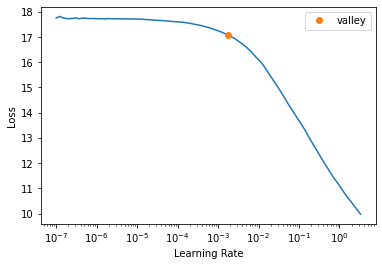

In [27]:
learn.lr_find()

In [28]:
learn.fine_tune(30, 2e-3)

epoch,train_loss,valid_loss,time
0,13.336089,9.509339,00:08


epoch,train_loss,valid_loss,time
0,8.079634,7.984867,00:08
1,7.158785,6.762509,00:08
2,6.408064,6.302545,00:08
3,5.864521,5.567688,00:08
4,5.763328,5.461112,00:07
5,5.013930,3.970337,00:08
6,3.697041,2.936322,00:08
7,3.047638,2.855637,00:08
8,2.807402,2.750275,00:08
9,2.718746,2.791116,00:08


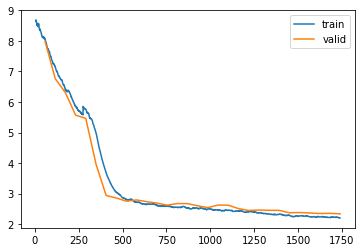

In [29]:
learn.recorder.plot_loss()

In [30]:
#torch.save(learn, "models/FNN_multipoint_12p.pth")

In [24]:
learn = load_learner("models/FNN_multipoint_12p.pth")

In [25]:
learn.eval()

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=25, out_features=1000, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=1000, out_features=500, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=500, out_features=12, bias=True)
    )
    (3): SigmoidRange(low=0, high=36)
  )
)

In [26]:
to_load = load_pandas('PP.pkl')

In [27]:
to_test = to_load.train.new(df_test)
to_test.process()

In [28]:
dls_test = to_test.dataloaders()

In [47]:
preds,targs = learn.get_preds(dl=dls_test[0])

In [30]:
multiPointLoss(targs, preds)

tensor(3.7310)

In [31]:
preds.shape

torch.Size([641, 12])

In [32]:
preds.shape

torch.Size([641, 12])

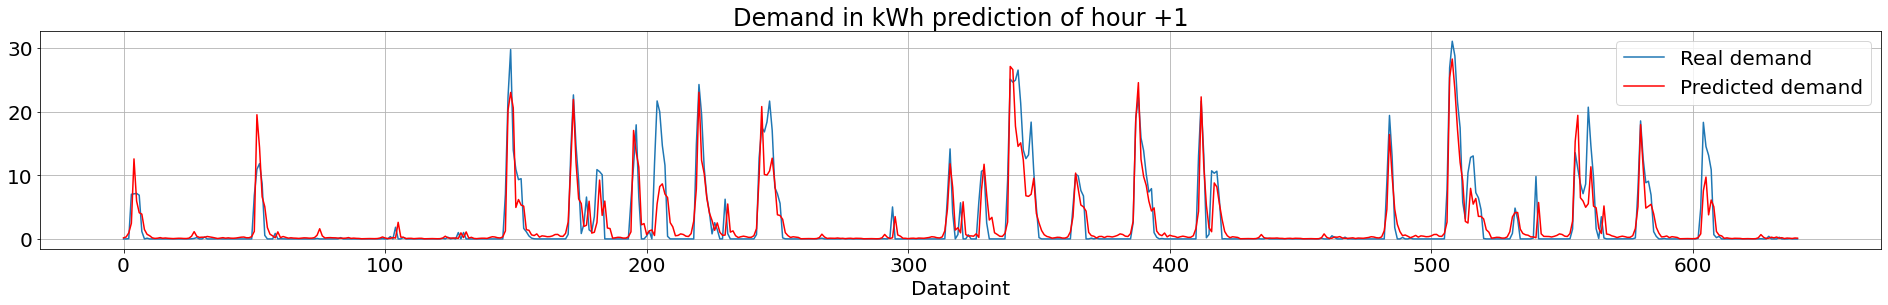

In [33]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(33,4))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Demand in kWh prediction of hour +1')
#plt.ylabel('Hourly charging demand in kWh')
plt.xlabel('Datapoint')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

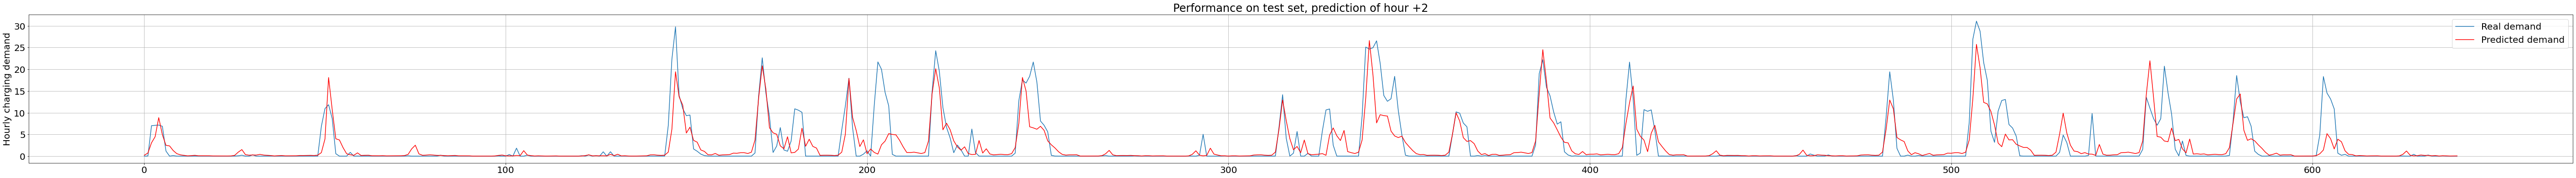

In [34]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,1])
plt.plot(range(len(preds)), preds[:,1], 'r')
plt.title('Performance on test set, prediction of hour +2')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

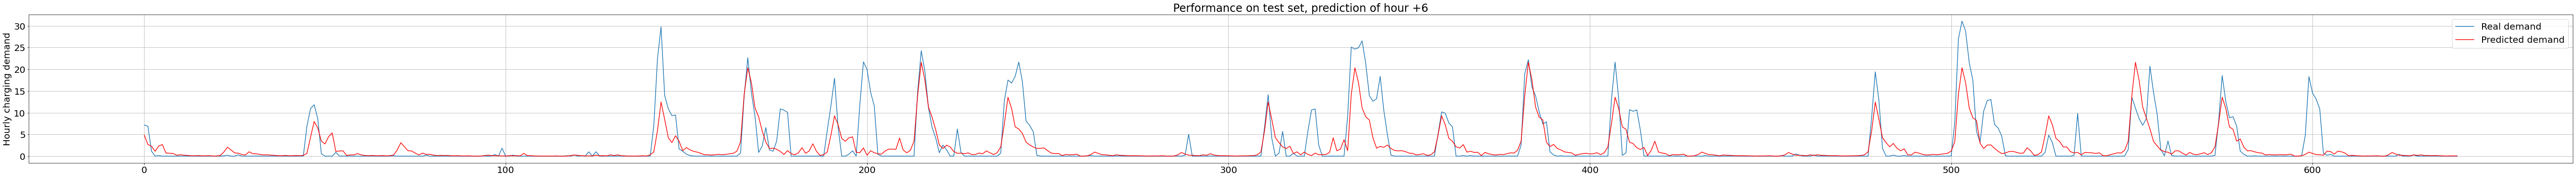

In [35]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,5])
plt.plot(range(len(preds)), preds[:,5], 'r')
plt.title('Performance on test set, prediction of hour +6')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

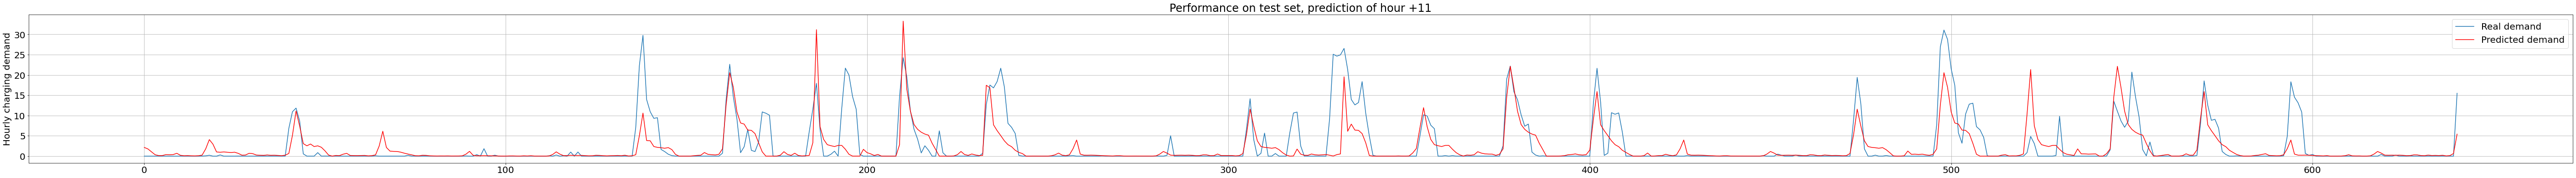

In [36]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,10])
plt.plot(range(len(preds)), preds[:,10], 'r')
plt.title('Performance on test set, prediction of hour +11')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

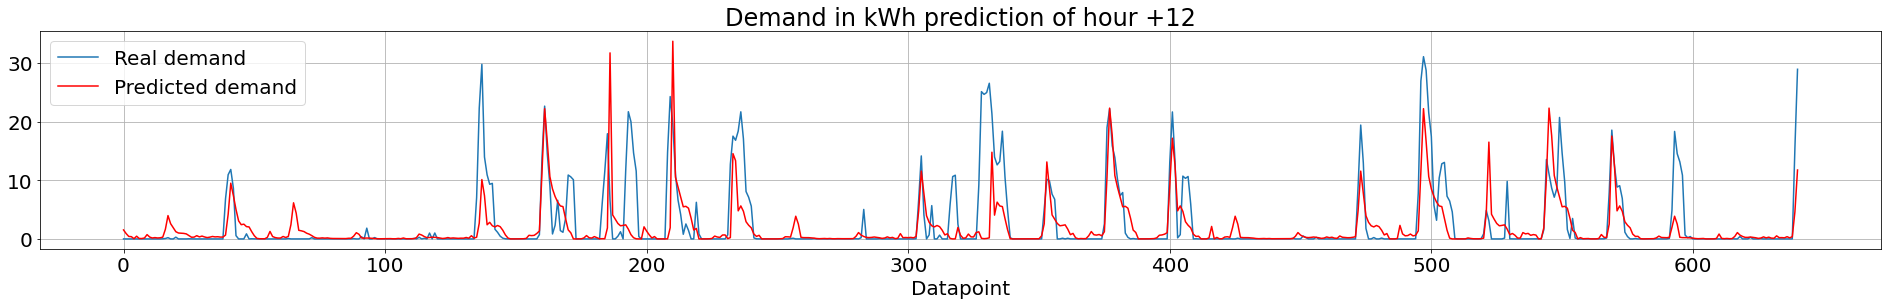

In [37]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(33,4))
plt.plot(range(len(targs)), targs[:,11])
plt.plot(range(len(preds)), preds[:,11], 'r')
plt.title('Demand in kWh prediction of hour +12')
#plt.ylabel('Hourly charging demand in kWh')
plt.xlabel('Datapoint')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

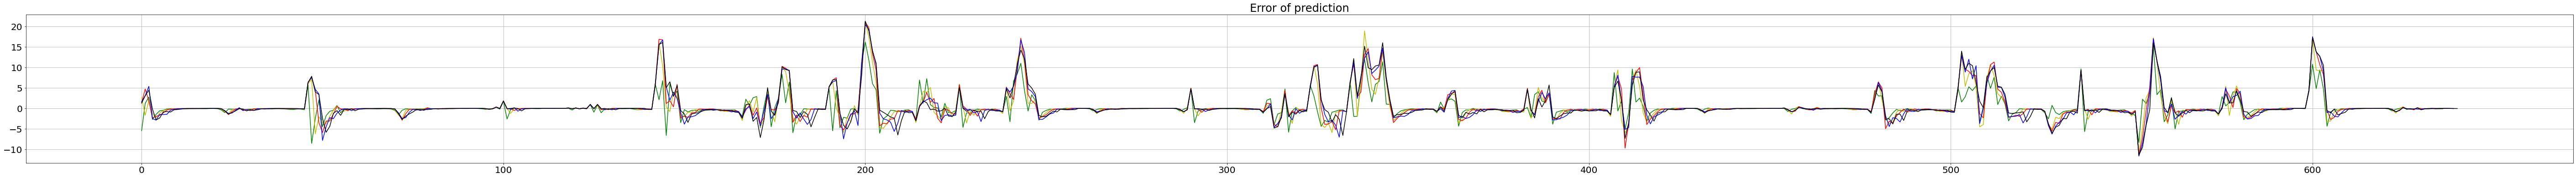

In [38]:
plt.figure(figsize=(100,6))
plt.plot(range(len(preds)-4), targs[4:,0] - preds[4:,0], 'g')
plt.plot(range(len(preds)-3), targs[3:,1] - preds[3:,1], 'y')
plt.plot(range(len(preds)-2), targs[2:,2] - preds[2:,2], 'r')
plt.plot(range(len(preds)-1), targs[1:,3] - preds[1:,3], 'b')
plt.plot(range(len(preds)), targs[:,4] - preds[:,4], 'k')
plt.title('Error of prediction')
plt.grid()
plt.show()

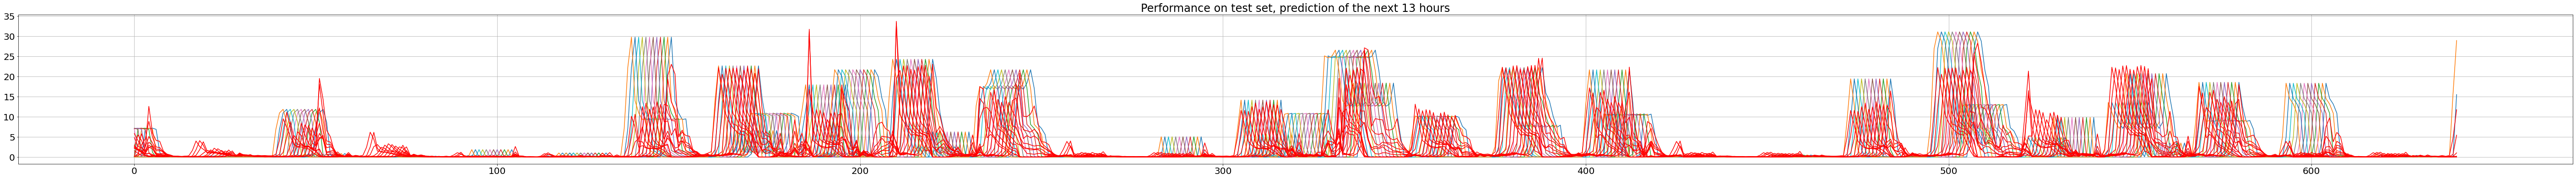

In [39]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,:])
plt.plot(range(len(preds)), preds[:,:], 'r')
plt.title('Performance on test set, prediction of the next 13 hours')
plt.grid()
plt.show()

In [40]:
preds,targs = learn.get_preds()

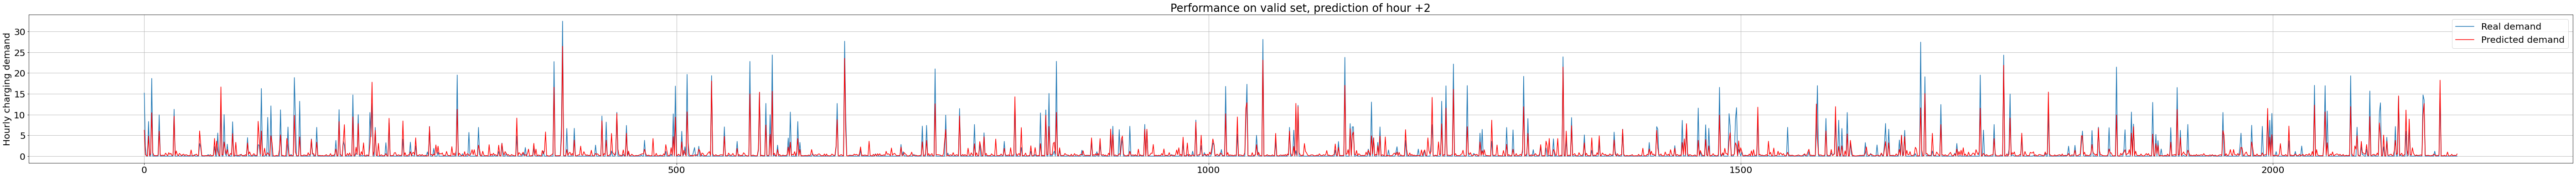

In [45]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Performance on valid set, prediction of hour +2')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

In [46]:
# Custom loss for multi-point forecasting

def multiPointLoss_hours(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = F.mse_loss(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = torch.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return scores

In [48]:
multiPointLoss_hours(targs, preds)

[tensor(2.5552),
 tensor(3.3242),
 tensor(3.5622),
 tensor(3.6438),
 tensor(3.6045),
 tensor(3.6462),
 tensor(3.7208),
 tensor(3.8588),
 tensor(3.9068),
 tensor(4.0358),
 tensor(4.0903),
 tensor(4.4940)]